# Data Visualization Part 2



#### Submitted by
##### Aman Sahani
##### Matriculation number : 
##### email : aman.sahani.main@gmail.com

## 1: Visualization Exercises

Loading the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure
from matplotlib import gridspec

Loading the Datasets

In [2]:
signals = pd.read_csv("10_project_data_signals.csv")
annotations = pd.read_csv("10_project_data_annotation.csv")
scatters = pd.read_csv('10_project_data_scatter.csv')
bars = pd.read_csv('10_project_data_barplot.csv')
#including index column as they act as positions at the X axis
signals = signals.reset_index()

Looking at the head of all the datasets

In [3]:
signals.head()

,index,P1,P2,P3,P4
0,0,0.28,0.14,0.19,0.19
1,1,0.30,0.16,0.17,0.20
2,2,0.26,0.13,0.20,0.12
3,3,0.21,0.13,0.25,0.15
4,4,0.31,0.03,0.24,0.20


In [4]:
annotations.head()

,name,type,start,stop,strand
0,geneA,transcript,2000,7764,+
1,geneA,exon,2700,5100,+
2,geneA,exon,6000,6800,+
3,geneB,transcript,9000,12720,-
4,geneB,exon,9900,10100,-


### 1.1: Version 1

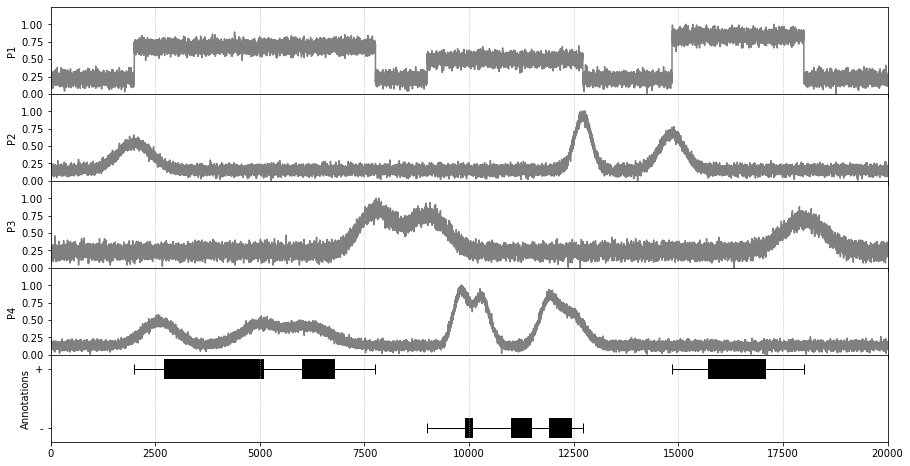

In [5]:

#Create a new figure with 5 subplots and define the size
fig, axs = plt.subplots(5, 1, sharex=True,figsize=(15,8))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

# Plot each signal graph, and manually set the y tick values
axs[0].plot(signals["index"],signals["P1"], label = "P1",color="grey")
axs[0].set_xlim(0, 20000)
axs[0].set_ylabel("P1")
axs[0].xaxis.grid(linestyle='dotted') 
axs[0].set_yticks(np.arange(0.0, 1.25, 0.25))
axs[0].set_ylim(0, 1.25) 

axs[1].plot(signals["index"],signals["P2"], label = "P2",color="grey")
axs[1].set_xlim(0, 20000)
axs[1].set_ylabel("P2")
axs[1].xaxis.grid(linestyle='dotted') 
axs[1].set_yticks(np.arange(0.0, 1.25, 0.25))
axs[1].set_ylim(0, 1.25)

axs[2].plot(signals["index"],signals["P3"], label = "P3",color="grey")
axs[2].set_xlim(0, 20000)
axs[2].set_ylabel("P3")
axs[2].xaxis.grid(linestyle='dotted') 
axs[2].set_yticks(np.arange(0.0, 1.25, 0.25))
axs[2].set_ylim(0, 1.25)

axs[3].plot(signals["index"],signals["P4"], label = "P4",color="grey")
axs[3].set_xlim(0, 20000)
axs[3].set_ylabel("P4")
axs[3].xaxis.grid(linestyle='dotted') 
axs[3].set_yticks(np.arange(0.0, 1.25, 0.25))
axs[3].set_ylim(0, 1.25)


#Get a list of type = transcript to make the lines with wiskers
transcripts = annotations[annotations['type'].str.contains('transcript')]
#Get the values of start stop and strand for type = transcript
Transcriptlist = transcripts[['start','stop','strand']]

#Similarly get the values same values for type = exon
annotations['diff'] = annotations['stop'] - annotations['start']  #Difference of Start and Stop is required to plot broken bars
exons = annotations[annotations['type'].str.contains('exon')]
Exonlist = exons[['start', 'diff', 'strand']]

#Plot the annotations graph
# We have used broken barh graph for this
#A rectangle is drawn for each element of xranges. All rectangles have the same vertical position and size defined by yrange.
for rows in range(len(Transcriptlist)):
    if Transcriptlist.iloc[rows,2] == '+':        
        y = 0.6
    elif Transcriptlist.iloc[rows,2] == '-':
        y = 0.3
    verts = [(Transcriptlist.iloc[rows,0], y), (Transcriptlist.iloc[rows,1], y)]
    xs, ys = zip(*verts)
    axs[4].plot(xs, ys, '|-', lw=1, color='black', ms=10)


for rows in range(len(Exonlist)):
    if Exonlist.iloc[rows,2] == '+':
        y = 0.55            
        height = 0.1        
    elif Exonlist.iloc[rows,2] == '-':
        y = 0.25           
        height = 0.1       
    axs[4].broken_barh([(Exonlist.iloc[rows,0], Exonlist.iloc[rows,1])], (y, height), facecolors='black')

#Combining the graph with the main plot and set x and y ticks
axs[4].set_xlim(0, 20000)
axs[4].set_yticks([0.3, 0.6])
axs[4].set_yticklabels(['-', '+'])
axs[4].set_ylabel("Annotations")
axs[4].xaxis.grid(linestyle='dotted') 

plt.show()

### 1.2: Version 2

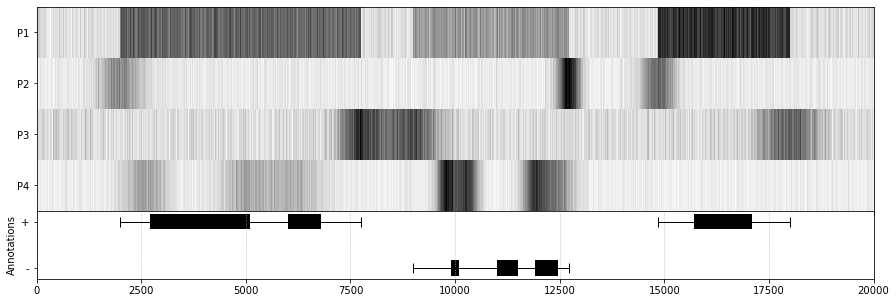

In [6]:
#Plotting the intensity graph with the help of pcolormesh

diffSignals = signals[['P4', 'P3', 'P2', 'P1']]

#transposing the signals to use as Z value in pcolormesh
diffSignals = np.transpose(diffSignals)

#create x and y
x = np.arange(-0.5, 20000, 1)  
y = np.arange(-0.5, 4.5, 1)  

#create a new subplot
fig,  axs = plt.subplots(2, 1, sharex=True,gridspec_kw={'height_ratios': [3, 1]},figsize=(15,5))
fig.subplots_adjust(hspace=0)

axs[0].pcolormesh(x, y, diffSignals, cmap='Greys')   
axs[0].set_yticks([0.0, 1.0, 2.0, 3.0])           
axs[0].set_yticklabels(['P4', 'P3', 'P2', 'P1'])  

#Plot the annotations graph
# We have used broken barh graph for this
#A rectangle is drawn for each element of xranges. All rectangles have the same vertical position and size defined by yrange.
for rows in range(len(Transcriptlist)):
    if Transcriptlist.iloc[rows,2] == '+':        
        y = 0.6
    elif Transcriptlist.iloc[rows,2] == '-':
        y = 0.3
    verts = [(Transcriptlist.iloc[rows,0], y), (Transcriptlist.iloc[rows,1], y)]
    xs, ys = zip(*verts)
    axs[1].plot(xs, ys, '|-', lw=1, color='black', ms=10)


for rows in range(len(Exonlist)):
    if Exonlist.iloc[rows,2] == '+':
        y = 0.55            
        height = 0.1        
    elif Exonlist.iloc[rows,2] == '-':
        y = 0.25           
        height = 0.1       
    axs[1].broken_barh([(Exonlist.iloc[rows,0], Exonlist.iloc[rows,1])], (y, height), facecolors='black')

#Combining the graph with the main plot and set x and y ticks
axs[1].set_xlim(0, 20000)
axs[1].set_yticks([0.3, 0.6])
axs[1].set_yticklabels(['-', '+'])
axs[1].set_ylabel("Annotations")
axs[1].xaxis.grid(linestyle='dotted') 

plt.show()

### 1.3: Version 3

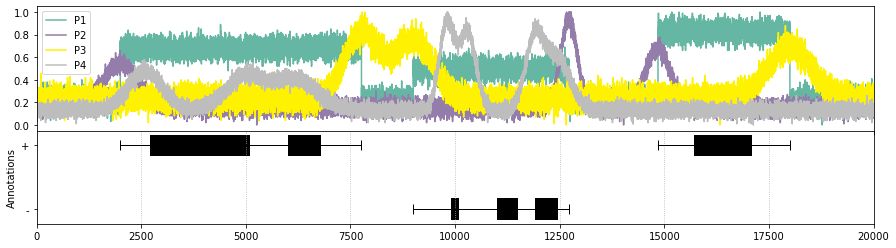

In [7]:
fig, axs = plt.subplots(2, 1, sharex=True,gridspec_kw={'height_ratios': [2, 1.5]},figsize=(15,4))
fig.subplots_adjust(hspace=0)

#Plotting all 4 Ps in same box
axs[0].plot(signals["index"],signals["P1"], label = "P1", color = "#65b7a4")
axs[0].plot(signals["index"],signals["P2"], label = "P2", color = "#947cab")
axs[0].plot(signals["index"],signals["P3"], label = "P3", color = "#fff200")
axs[0].plot(signals["index"],signals["P4"], label = "P4", color = "#bdbdbd")
axs[0].set_xlim(0, 20000)
axs[0].legend()

#Plot the annotations graph
# We have used broken barh graph for this
#A rectangle is drawn for each element of xranges. All rectangles have the same vertical position and size defined by yrange.
for rows in range(len(Transcriptlist)):
    if Transcriptlist.iloc[rows,2] == '+':        
        y = 0.6
    elif Transcriptlist.iloc[rows,2] == '-':
        y = 0.3
    verts = [(Transcriptlist.iloc[rows,0], y), (Transcriptlist.iloc[rows,1], y)]
    xs, ys = zip(*verts)
    axs[1].plot(xs, ys, '|-', lw=1, color='black', ms=10)


for rows in range(len(Exonlist)):
    if Exonlist.iloc[rows,2] == '+':
        y = 0.55            
        height = 0.1        
    elif Exonlist.iloc[rows,2] == '-':
        y = 0.25           
        height = 0.1       
    axs[1].broken_barh([(Exonlist.iloc[rows,0], Exonlist.iloc[rows,1])], (y, height), facecolors='black')

#Combining the graph with the main plot and set x and y ticks
axs[1].set_xlim(0, 20000)
axs[1].set_yticks([0.3, 0.6])
axs[1].set_yticklabels(['-', '+'])
axs[1].set_ylabel("Annotations")
axs[1].xaxis.grid(linestyle='dotted') 

plt.show()

### 1.4: Discussion

#### Discuss the pros and cons between the three different visualization approaches.

#### _Version 1_

##### Pros
* We can clearly see the four individual RNA binding proteins (P1, P2, P3, P4).
* It is easy to visualize the highs and lows of each bindings.

##### Cons

* The scale and quantity of proteins are limited.

#### _Version 2_

##### Pros
 
* The intensity is easy to visualize in this graph than in graph 1. 
* Easy to distinct visually.
    
##### Cons:
 * We cannot extract the high and low values like graph one.
    
#### _Version 3_

##### Pros:

* All the data four protien bindings can be viewed together .
* the colors are more appealing and easy to distinguish.

##### Cons

* The plot is again limited to scale and the number of protein bindings we can show.

## 2: Visualization Exercises

Checking the head of scatter data

In [8]:
scatters.head()

,x1,x2
0,8.41,5.43
1,9.56,3.92
2,10.83,1.80
3,11.14,2.32
4,11.41,1.41


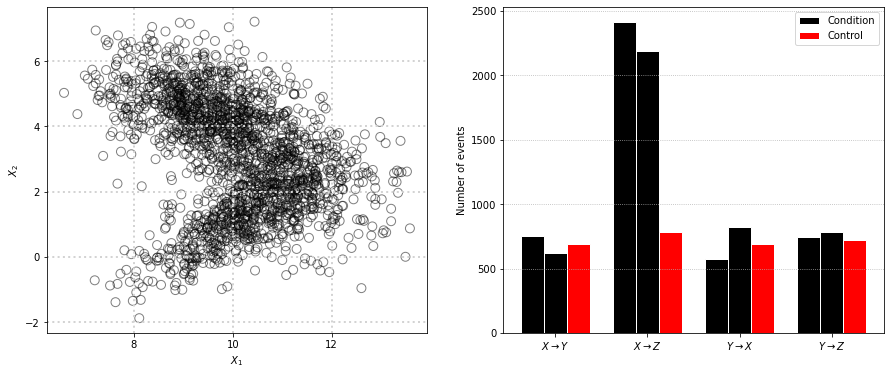

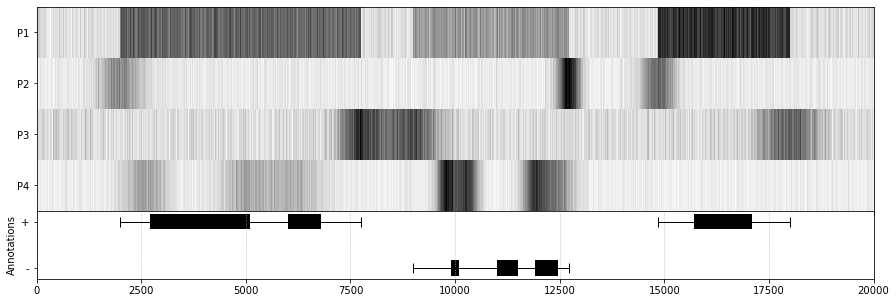

In [18]:
fig, (ax, axs) = plt.subplots(1,2,figsize=(15,6))

#Set scatter data
ax.scatter(scatters["x1"], scatters["x2"], s=80, alpha=0.5, facecolors='none', edgecolors='black')
ax.set_xticks([8,10,12])
ax.grid(color='#d3d3d3', linestyle='dotted', linewidth=2)
#ax.xticks([8,10,12])
ax.set_ylabel('$X_{2}$')
ax.set_xlabel('$X_{1}$')

# set width of bars
barWidth = 0.25

#Set X-ticks names using latex
labels = [r'$X{\rightarrow}Y$', r'$X{\rightarrow}Z$', r'$Y{\rightarrow}X$', r'$Y{\rightarrow}Z$']
# create bar data
bars1 = bars['condition_a_sample_1']
bars2 = bars['condition_a_sample_2']
bars3 = bars['control']

# Set position of bar
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]


axs.bar(r1, bars1, color='black', width=barWidth, edgecolor='white', label='Condition')
axs.bar(r2, bars2, color='black', width=barWidth, edgecolor='white')
axs.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='Control')

plt.ylabel('Number of events')
plt.xticks(r1+barWidth, labels)
plt.grid(axis='y',linestyle='dotted')        
 
# Create legend & Show graphic
plt.legend()

#Plotting the intensity graph with the help of pcolormesh

diffSignals = signals[['P4', 'P3', 'P2', 'P1']]

#transposing the signals to use as Z value in pcolormesh
diffSignals = np.transpose(diffSignals)

#create x and y
x = np.arange(-0.5, 20000, 1)  
y = np.arange(-0.5, 4.5, 1)  

#create a new subplot
fig,  axs = plt.subplots(2, 1, sharex=True,gridspec_kw={'height_ratios': [3, 1]},figsize=(15,5))
fig.subplots_adjust(hspace=0)

axs[0].pcolormesh(x, y, diffSignals, cmap='Greys')   
axs[0].set_yticks([0.0, 1.0, 2.0, 3.0])           
axs[0].set_yticklabels(['P4', 'P3', 'P2', 'P1'])  

#Plot the annotations graph
# We have used broken barh graph for this
#A rectangle is drawn for each element of xranges. All rectangles have the same vertical position and size defined by yrange.
for rows in range(len(Transcriptlist)):
    if Transcriptlist.iloc[rows,2] == '+':        
        y = 0.6
    elif Transcriptlist.iloc[rows,2] == '-':
        y = 0.3
    verts = [(Transcriptlist.iloc[rows,0], y), (Transcriptlist.iloc[rows,1], y)]
    xs, ys = zip(*verts)
    axs[1].plot(xs, ys, '|-', lw=1, color='black', ms=10)


for rows in range(len(Exonlist)):
    if Exonlist.iloc[rows,2] == '+':
        y = 0.55            
        height = 0.1        
    elif Exonlist.iloc[rows,2] == '-':
        y = 0.25           
        height = 0.1       
    axs[1].broken_barh([(Exonlist.iloc[rows,0], Exonlist.iloc[rows,1])], (y, height), facecolors='black')

#Combining the graph with the main plot and set x and y ticks
axs[1].set_xlim(0, 20000)
axs[1].set_yticks([0.3, 0.6])
axs[1].set_yticklabels(['-', '+'])
axs[1].set_ylabel("Annotations")
axs[1].xaxis.grid(linestyle='dotted') 

plt.show()

## 3: Text Exercise

##### Summarize the article 'Pencil and paper' by Wong & Kjaergaard. What are the key points? Do not copy and paste from the article. Summarize in your own words.

Through this scientific paper the authors wants to emphasize the effects of visual representation on the mind of readers as compared to plain words.

According to the authors, words leave a lingering doubt of ambiguity which the graphs and plots eliminates. Even the most basic visual representation of a cell will be much clear than their paragraphed counterpart. Making simple doodles using pencil and papers will put forward any ambiguity and it needs to be dealt with in order to get a clear picture and can even lead to alternate conclusions.

Drawing is linked to creating mental maps which signigicantly enhances insights.Visual communication helps people retain information and creates a stronger connection as opposed to verbal communication. Even students performed  better when they were tasked to draw.

Our ability to retain visual information can be easily triggered by explaining the process in steps with visual representations to retain the information for longer periods and can easily overcome the limitations of our working memory.

The authors conclude that visual representation and it's power to connect our understanding of thinking and exploring is vital for scientific process.